In [351]:
import requests as Request
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from csv import writer
import numpy as np
import re

In [8]:
# web scraping process
job_details = []
txt_elements = []

for page  in range(1):
    url = "http://jobs.phnomlist.com/search?page=" +  str(page+1)
    request_site = Request(url, headers ={'User-Agent': 'Mozilla/5.0'} )
    webpage = urlopen(request_site).read()
    soup = BeautifulSoup(webpage, 'html.parser')

    job_elements = soup.find_all("div", class_="job-title")

    for element in job_elements:
        data = {}
        job_titile = element.find('a')
        data['Job Titile'] = job_titile.text.strip()
        data['Job Details Link'] = 'http://jobs.phnomlist.com' + element.a.attrs['href']

        # --- scrap salary 
        request_site_2 = Request(data['Job Details Link'], headers ={'User-Agent': 'Mozilla/5.0'} )
        webpage_2 = urlopen(request_site_2).read()
        soup_2 = BeautifulSoup(webpage_2, 'html.parser')

        job_elements_2 = soup_2.find_all("h3", class_="text-danger salary-offer show-salary")
        data['Salary'] = job_elements_2[0].i.string.replace("<i>", "" ).strip()

        # --- scrap table in page ---

        table_MN = pd.read_html(data['Job Details Link'])

        for i in range(len(table_MN)):
            for j in range(len(table_MN[i])):
                data[table_MN[i][0][j]] = table_MN[i][1][j]

        txt_elements.append(
            [
                data['Job Titile']
                ,data['Job Details Link']
                ,data['Job Type']
                ,data['Job Function']
                ,data['Position Level']
                ,data['Location']
                ,data['Posted Date']
                ,data['Closing Date']
                ,data['Working Experience']
                ,data['Preferred Gender']
                ,data['Age']
                ,data['Company Name']
                ,data['Industry']
                ,data['Contact Person']
                ,data['Salary']
            ]
        )
    print(page+1)

with open('tmp_file.txt', 'w') as f:
    writer(f, delimiter='|').writerows(txt_elements)

1


In [352]:
# --- data frame header ---

header = [
    'Job Title'
    ,'Job Details Link'
    ,'Job Type'
    ,'Job Function'
    ,'Position Level'
    ,'Location'
    ,'Posted Date'
    ,'Closing Date'
    ,'Working Experience'
    ,'Preferred Gender'
    ,'Age'
    ,'Company Name'
    ,'Industry'
    ,'Contact Person'
    ,'Salary'
]
# --- load data from text
data=np.loadtxt("job_posting.txt", delimiter='|',usecols=range(15),dtype='str',comments = '*****')

# --- convert array to data frame ---
records = pd.DataFrame(data,columns=header)

In [322]:
records.head()

,Job Title,Job Details Link,Job Type,Job Function,Position Level,Location,Posted Date,Closing Date,Working Experience,Preferred Gender,Age,Company Name,Industry,Contact Person,Salary
0,Retail Associate,http://jobs.phnomlist.com/post/26496/Retail-As...,Full Time,General Work,Junior Executive,"4th Floor, Unit 01, #25, Mao Tse Tung Blvd, Sa...",13 Jun 2023,12 Aug 2023,No preference,Any,18 - 35,"iOne Co., Ltd",Information Technology / Digital,HR Department,Negotiable
1,Technical Support,http://jobs.phnomlist.com/post/26497/Technical...,Full Time,General Work,Junior Executive,"4th Floor, Unit 01, #25, Mao Tse Tung Blvd, Sa...",13 Jun 2023,12 Aug 2023,< 2 years,Any,18 - 35,"iOne Co., Ltd",Information Technology / Digital,HR Department,Negotiable
2,Sales Supervisor,http://jobs.phnomlist.com/post/26494/Sales-Sup...,Full Time,Food/Beverage/Restaurant,Senior Executive,"Unit 6-1 & 6-2, Level 6, Menara Mudajaya, No. ...",23 May 2023,22 Jul 2023,5-8 years,Any,25 - 40,Rich Products (M) Sdn Bhd,Food and Berverage,Nurul Maulidya,$501 - $1000 USD
3,Technical Sales Executive (Pastry/Culinary Chef),http://jobs.phnomlist.com/post/26495/Technical...,Full Time,Food/Beverage/Restaurant,Junior Executive,"Unit 6-1 & 6-2, Level 6, Menara Mudajaya, No. ...",30 May 2023,29 Jul 2023,2-5 years,Any,23 - 35,Rich Products (M) Sdn Bhd,Food and Berverage,Nurul Maulidya,$501 - $1000 USD
4,Assistant Admin & Acc,http://jobs.phnomlist.com/post/13919/Assistant...,Full Time,Clerical/Administrative,Junior Executive,"#153,St.Mao Tse Toung Blvd, Phnom Penh., Phnom...",10 Feb 2017,01 Jan 2024,No preference,Any,18 - 50,Eco Elictric (Pickup & Maman),Electrical and Electronics,Ms.Nika Saman,Negotiable


In [323]:
records.shape

(14025, 15)

In [353]:
records['Salary'] = records['Salary'].str.replace('$','').str.replace('USD','').str.replace('<','').str.replace('>','').str.replace(' ','').str.replace('Negotiable','')
records[['Min Salary', 'Max Salary']] = records.Salary.str.split("-", expand = True)
records['Job Title'] = records['Job Title'].str.split("(", expand = True)[0]

/var/folders/cn/w0zvn_h90s5c2v3h25bwrfj40000gn/T/ipykernel_777/1616354099.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  records['Salary'] = records['Salary'].str.replace('$','').str.replace('USD','').str.replace('<','').str.replace('>','').str.replace(' ','').str.replace('Negotiable','')


In [354]:
# clean coulumn job titile data
records['Job Title'].str.split("(", expand = True)[0]
records['Job Title'].str.split("(", expand = True)[0]
records['Job Title'] = records['Job Title'].str.replace('+','').str.replace('*','').str.replace('★','').str.replace('•','').str.replace('-','').str.replace('`','')
records['Job Title'] = records['Job Title'].str.replace(':','').str.replace('"','').str.replace('part time/ full time','').str.replace('អ្នករត់តុ ប្រុស​ /​ ស្រី','')
records['Job Title'] = records['Job Title'].str.replace('in companies 160250$','').str.replace('Urgent','').str.replace('[','').str.replace(']','').str.replace('】','').str.replace('】','')
records['Job Title'] = records['Job Title'].str.replace('【','').str.replace('3D', 'Three D').str.replace('!','')
records['Job Title'] = records['Job Title'].replace(to_replace=r'\d', value='', regex=True)
records['Job Title'] = records['Job Title'].str.replace('Us$','').str.replace('$','').replace('-','').str.replace('_','').str.replace('.','').str.replace('（）','')
records['Job Title'] = records['Job Title'].str.replace('Us –','').str.replace('Usd Up','').str.replace('(','').str.replace(')','').str.replace(',','')
records['Job Title'] = records['Job Title'].str.replace('  Positions', '').str.replace(' Position', '').str.replace('  Up','')
records['Job Title'] = records['Job Title'].str.replace('Salesman', 'Sales Staff').str.replace('Salesperson', 'Sales Staff').str.replace('Salesgirl','Sales Staff')
records['Job Title'] = records['Job Title'].str.replace('Saleswoman', 'Sales Staff').str.replace('Saleswoman', 'Sales Staff').str.replace('Saleswomen','Sales Staff')
records['Job Title'] = records['Job Title'].str.replace('Sales Staffs', 'Sales Staff').str.replace('~', '')
records['Job Title'] = records['Job Title'].str.replace('=', '').str.replace(' Person', '').replace('C# Application Developer','C# Developer')
records['Job Title'] = records['Job Title'].str.replace('Female Only', '').str.replace('–', '')
records['Job Title'] = records['Job Title'].str.replace('##', '')

records['Job Title'] = records['Job Title'].str.split("/", expand = True)[0]
records['Job Title'] = records['Job Title'].str.split("/", expand = True)[0]
records['Job Title'] = records['Job Title'].str.split("/", expand = True)[0]
records['Job Title'] = records['Job Title'].str.split("/", expand = True)[0]
records['Job Title'] = records['Job Title'].str.split("/", expand = True)[0]

records['Job Title'] = records['Job Title'].str.split(" & ", expand = True)[0]
records['Job Title'] = records['Job Title'].str.split(" & ", expand = True)[0]
records['Job Title'] = records['Job Title'].str.split(" & ", expand = True)[0]

records['Job Title'] = records['Job Title'].str.split(" &", expand = True)[0]

records['Job Title'] = records['Job Title'].str.split(" – ", expand = True)[0]


records['Job Title'] = records['Job Title'].str.title()
records['Job Title'] = records['Job Title'].str.strip()

/var/folders/cn/w0zvn_h90s5c2v3h25bwrfj40000gn/T/ipykernel_777/2352206605.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  records['Job Title'] = records['Job Title'].str.replace('+','').str.replace('*','').str.replace('★','').str.replace('•','').str.replace('-','').str.replace('`','')
/var/folders/cn/w0zvn_h90s5c2v3h25bwrfj40000gn/T/ipykernel_777/2352206605.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  records['Job Title'] = records['Job Title'].str.replace('in companies 160250$','').str.replace('Urgent','').str.replace('[','').str.replace(']','').str.replace('】','').str.replace('】','')
/var/folders/cn/w0zvn_h90s5c2v3h25bwrfj40000gn/T/ipykernel_777/2352206605.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, s

In [356]:
# clean coulumn job titile data

records['Job Function'] = records['Job Function'].str.replace('"', '')
records['Job Function'] = records['Job Function'].str.title()
records['Job Function'] = records['Job Function'].str.strip()

In [297]:
# records['Working Experience'] = records['Working Experience'].str.replace('<','-')
# records['Working Experience'] = records['Working Experience'].str.replace('>','-')
# records[['Min Salary', 'Max Salary']] = records['Working Experience'].str.split("-", expand = True)

In [357]:
# convert data type
records['Posted Date'] = pd.to_datetime(records['Posted Date'], errors='coerce')

In [328]:
records.isnull().sum()

Job Title                 0
Job Details Link          0
Job Type                  0
Job Function              0
Position Level            0
Location                  0
Posted Date             152
Closing Date              0
Working Experience        0
Preferred Gender          0
Age                       0
Company Name              0
Industry                  0
Contact Person            0
Salary                    0
Min Salary                0
Max Salary            12700
dtype: int64

In [358]:
df_remove_null_post_date = records[records['Posted Date'].notna()]
df_remove_null_post_date

,Job Title,Job Details Link,Job Type,Job Function,Position Level,Location,Posted Date,Closing Date,Working Experience,Preferred Gender,Age,Company Name,Industry,Contact Person,Salary,Min Salary,Max Salary
0,Retail Associate,http://jobs.phnomlist.com/post/26496/Retail-As...,Full Time,General Work,Junior Executive,"4th Floor, Unit 01, #25, Mao Tse Tung Blvd, Sa...",2023-06-13,12 Aug 2023,No preference,Any,18 - 35,"iOne Co., Ltd",Information Technology / Digital,HR Department,,,None
1,Technical Support,http://jobs.phnomlist.com/post/26497/Technical...,Full Time,General Work,Junior Executive,"4th Floor, Unit 01, #25, Mao Tse Tung Blvd, Sa...",2023-06-13,12 Aug 2023,< 2 years,Any,18 - 35,"iOne Co., Ltd",Information Technology / Digital,HR Department,,,None
2,Sales Supervisor,http://jobs.phnomlist.com/post/26494/Sales-Sup...,Full Time,Food/Beverage/Restaurant,Senior Executive,"Unit 6-1 & 6-2, Level 6, Menara Mudajaya, No. ...",2023-05-23,22 Jul 2023,5-8 years,Any,25 - 40,Rich Products (M) Sdn Bhd,Food and Berverage,Nurul Maulidya,501-1000,501,1000
3,Technical Sales Executive,http://jobs.phnomlist.com/post/26495/Technical...,Full Time,Food/Beverage/Restaurant,Junior Executive,"Unit 6-1 & 6-2, Level 6, Menara Mudajaya, No. ...",2023-05-30,29 Jul 2023,2-5 years,Any,23 - 35,Rich Products (M) Sdn Bhd,Food and Berverage,Nurul Maulidya,501-1000,501,1000
4,Assistant Admin,http://jobs.phnomlist.com/post/13919/Assistant...,Full Time,Clerical/Administrative,Junior Executive,"#153,St.Mao Tse Toung Blvd, Phnom Penh., Phnom...",2017-02-10,01 Jan 2024,No preference,Any,18 - 50,Eco Elictric (Pickup & Maman),Electrical and Electronics,Ms.Nika Saman,,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,អ្នកថែសួន,http://jobs.phnomlist.com/post/3116/----------...,Full Time,Architecture/Interior Design,Junior Executive,"#18A,St. 371, áá·ááááá¶áá¸áá...",2016-07-30,01 Jan 2024,No preference,Male,18 - 35,á¢ááááá¶ááááá¶áááá»á...,NGO / Non Profit / Social Service,HR team,200,200,None
14021,Operations Manager,http://jobs.phnomlist.com/post/1492/Operations...,Full Time,Top Management,Senior Executive,"Building #40D, Street 352, Sangkat Beong Keng ...",2016-07-22,01 Jan 2024,2-5 years,Any,18 - 50,"EBM Co., Ltd",Human Resource / Recruitment,Ms. PHENG Chhuylin,501-1000,501,1000
14022,System Analyst,http://jobs.phnomlist.com/post/1463/System-Ana...,Full Time,It-Network/Sys/Db Admin,Junior Executive,"Building #40D, Street 352, Sangkat Beong Keng ...",2016-07-22,01 Jan 2024,2-5 years,Any,18 - 50,"EBM Co., Ltd",Human Resource / Recruitment,Ms. NAT Sophornchealin,,,None
14023,Purchasing And Foqual Coordinator,http://jobs.phnomlist.com/post/1462/Purchasing...,Full Time,Top Management,Junior Executive,"Building #40D, Street 352, Sangkat Beong Keng ...",2016-07-22,01 Jan 2024,2-5 years,Any,18 - 50,"EBM Co., Ltd",Human Resource / Recruitment,Ms. NAT Sophornchealin,201-500,201,500


In [359]:
df_remove_null_post_date['Closing Date'] = pd.to_datetime(df_remove_null_post_date['Closing Date'], errors='coerce')

/var/folders/cn/w0zvn_h90s5c2v3h25bwrfj40000gn/T/ipykernel_777/1369216922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remove_null_post_date['Closing Date'] = pd.to_datetime(df_remove_null_post_date['Closing Date'], errors='coerce')


In [360]:
df_remove_null_post_date['Max Salary'] = df_remove_null_post_date['Max Salary'].astype('float64')

/var/folders/cn/w0zvn_h90s5c2v3h25bwrfj40000gn/T/ipykernel_777/144140641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remove_null_post_date['Max Salary'] = df_remove_null_post_date['Max Salary'].astype('float64')


In [361]:
df = records[records['Max Salary'].notna()]

In [362]:
#df.to_csv(r'records.csv')

In [363]:
#records.to_csv(r'job_posting_4.txt', header=None, index=None, sep='|', mode='a')

In [364]:
df.reset_index()

,index,Job Title,Job Details Link,Job Type,Job Function,Position Level,Location,Posted Date,Closing Date,Working Experience,Preferred Gender,Age,Company Name,Industry,Contact Person,Salary,Min Salary,Max Salary
0,2,Sales Supervisor,http://jobs.phnomlist.com/post/26494/Sales-Sup...,Full Time,Food/Beverage/Restaurant,Senior Executive,"Unit 6-1 & 6-2, Level 6, Menara Mudajaya, No. ...",2023-05-23,22 Jul 2023,5-8 years,Any,25 - 40,Rich Products (M) Sdn Bhd,Food and Berverage,Nurul Maulidya,501-1000,501,1000
1,3,Technical Sales Executive,http://jobs.phnomlist.com/post/26495/Technical...,Full Time,Food/Beverage/Restaurant,Junior Executive,"Unit 6-1 & 6-2, Level 6, Menara Mudajaya, No. ...",2023-05-30,29 Jul 2023,2-5 years,Any,23 - 35,Rich Products (M) Sdn Bhd,Food and Berverage,Nurul Maulidya,501-1000,501,1000
2,52,អ្នកបើកបរ,http://jobs.phnomlist.com/post/24912/---------...,Full Time,General Work,Fresh/Entry Level,áá¼áá·áááááááá áááá...,2018-06-19,01 Jan 2024,< 2 years,Male,18 - 40,Bonded Warehouse,Logistics / Transportation / Warehouse,Mr. VICHET,201-500,201,500
3,53,សន្តិសុខ,http://jobs.phnomlist.com/post/24911/---------...,Full Time,Logistics/Supply Chain,Fresh/Entry Level,áá¼áá·áááááááá áááá...,2018-06-19,01 Jan 2024,No preference,Any,18 - 40,Bonded Warehouse,Logistics / Transportation / Warehouse,Mr. VICHET,201-500,201,500
4,54,Warehouse Worker,http://jobs.phnomlist.com/post/24910/Warehouse...,Full Time,Logistics/Supply Chain,Fresh/Entry Level,"ភូមិព្រៃផ្ដៅ ស្រុកចន្ទ្រា ខេត្តស្វាយរៀង, Bavet",2018-06-19,01 Jan 2024,No preference,Any,18 - 40,Bonded Warehouse,Logistics / Transportation / Warehouse,Mr. VICHET,201-500,201,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,14014,Ja Marketing Officer,http://jobs.phnomlist.com/post/1528/JA--2365-M...,Full Time,Marketing/Business Development,Junior Executive,"Tous Les Jours Monivong Building,1st Floor, #2...",2016-07-22,01 Jan 2024,2-5 years,Any,18 - 50,CDL-HR,Human Resource / Recruitment,HR Officer,201-500,201,500
1321,14016,Stock Controller,http://jobs.phnomlist.com/post/1012/Stock-Cont...,Full Time,General/Cost Accounting,Junior Executive,"#18A,St. 371, áá·ááááá¶áá¸áá...",2016-07-22,01 Jan 2024,No preference,Male,18 - 35,á¢ááááá¶ááááá¶áááá»á...,NGO / Non Profit / Social Service,HR team,201-500,201,500
1322,14021,Operations Manager,http://jobs.phnomlist.com/post/1492/Operations...,Full Time,Top Management,Senior Executive,"Building #40D, Street 352, Sangkat Beong Keng ...",2016-07-22,01 Jan 2024,2-5 years,Any,18 - 50,"EBM Co., Ltd",Human Resource / Recruitment,Ms. PHENG Chhuylin,501-1000,501,1000
1323,14023,Purchasing And Foqual Coordinator,http://jobs.phnomlist.com/post/1462/Purchasing...,Full Time,Top Management,Junior Executive,"Building #40D, Street 352, Sangkat Beong Keng ...",2016-07-22,01 Jan 2024,2-5 years,Any,18 - 50,"EBM Co., Ltd",Human Resource / Recruitment,Ms. NAT Sophornchealin,201-500,201,500


In [365]:
import PlotGraph as pg
import HandlingOutliers as ho

df_cleaned = df[['Job Title', 'Job Type', 'Job Function', 'Position Level', 'Working Experience', 'Industry','Max Salary']]
df_cleaned['Max Salary'] = df_cleaned['Max Salary'].astype('float')
df_cleaned

/var/folders/cn/w0zvn_h90s5c2v3h25bwrfj40000gn/T/ipykernel_777/202558751.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Max Salary'] = df_cleaned['Max Salary'].astype('float')


,Job Title,Job Type,Job Function,Position Level,Working Experience,Industry,Max Salary
2,Sales Supervisor,Full Time,Food/Beverage/Restaurant,Senior Executive,5-8 years,Food and Berverage,1000.0
3,Technical Sales Executive,Full Time,Food/Beverage/Restaurant,Junior Executive,2-5 years,Food and Berverage,1000.0
52,អ្នកបើកបរ,Full Time,General Work,Fresh/Entry Level,< 2 years,Logistics / Transportation / Warehouse,500.0
53,សន្តិសុខ,Full Time,Logistics/Supply Chain,Fresh/Entry Level,No preference,Logistics / Transportation / Warehouse,500.0
54,Warehouse Worker,Full Time,Logistics/Supply Chain,Fresh/Entry Level,No preference,Logistics / Transportation / Warehouse,500.0
...,...,...,...,...,...,...,...
14014,Ja Marketing Officer,Full Time,Marketing/Business Development,Junior Executive,2-5 years,Human Resource / Recruitment,500.0
14016,Stock Controller,Full Time,General/Cost Accounting,Junior Executive,No preference,NGO / Non Profit / Social Service,500.0
14021,Operations Manager,Full Time,Top Management,Senior Executive,2-5 years,Human Resource / Recruitment,1000.0
14023,Purchasing And Foqual Coordinator,Full Time,Top Management,Junior Executive,2-5 years,Human Resource / Recruitment,500.0


In [366]:
df_cleaned.dtypes

Job Title              object
Job Type               object
Job Function           object
Position Level         object
Working Experience     object
Industry               object
Max Salary            float64
dtype: object

In [367]:
df_cleaned

,Job Title,Job Type,Job Function,Position Level,Working Experience,Industry,Max Salary
2,Sales Supervisor,Full Time,Food/Beverage/Restaurant,Senior Executive,5-8 years,Food and Berverage,1000.0
3,Technical Sales Executive,Full Time,Food/Beverage/Restaurant,Junior Executive,2-5 years,Food and Berverage,1000.0
52,អ្នកបើកបរ,Full Time,General Work,Fresh/Entry Level,< 2 years,Logistics / Transportation / Warehouse,500.0
53,សន្តិសុខ,Full Time,Logistics/Supply Chain,Fresh/Entry Level,No preference,Logistics / Transportation / Warehouse,500.0
54,Warehouse Worker,Full Time,Logistics/Supply Chain,Fresh/Entry Level,No preference,Logistics / Transportation / Warehouse,500.0
...,...,...,...,...,...,...,...
14014,Ja Marketing Officer,Full Time,Marketing/Business Development,Junior Executive,2-5 years,Human Resource / Recruitment,500.0
14016,Stock Controller,Full Time,General/Cost Accounting,Junior Executive,No preference,NGO / Non Profit / Social Service,500.0
14021,Operations Manager,Full Time,Top Management,Senior Executive,2-5 years,Human Resource / Recruitment,1000.0
14023,Purchasing And Foqual Coordinator,Full Time,Top Management,Junior Executive,2-5 years,Human Resource / Recruitment,500.0


In [368]:
hist = pd.DataFrame(df_cleaned['Job Function'].value_counts().nlargest(15))

<Axes: >

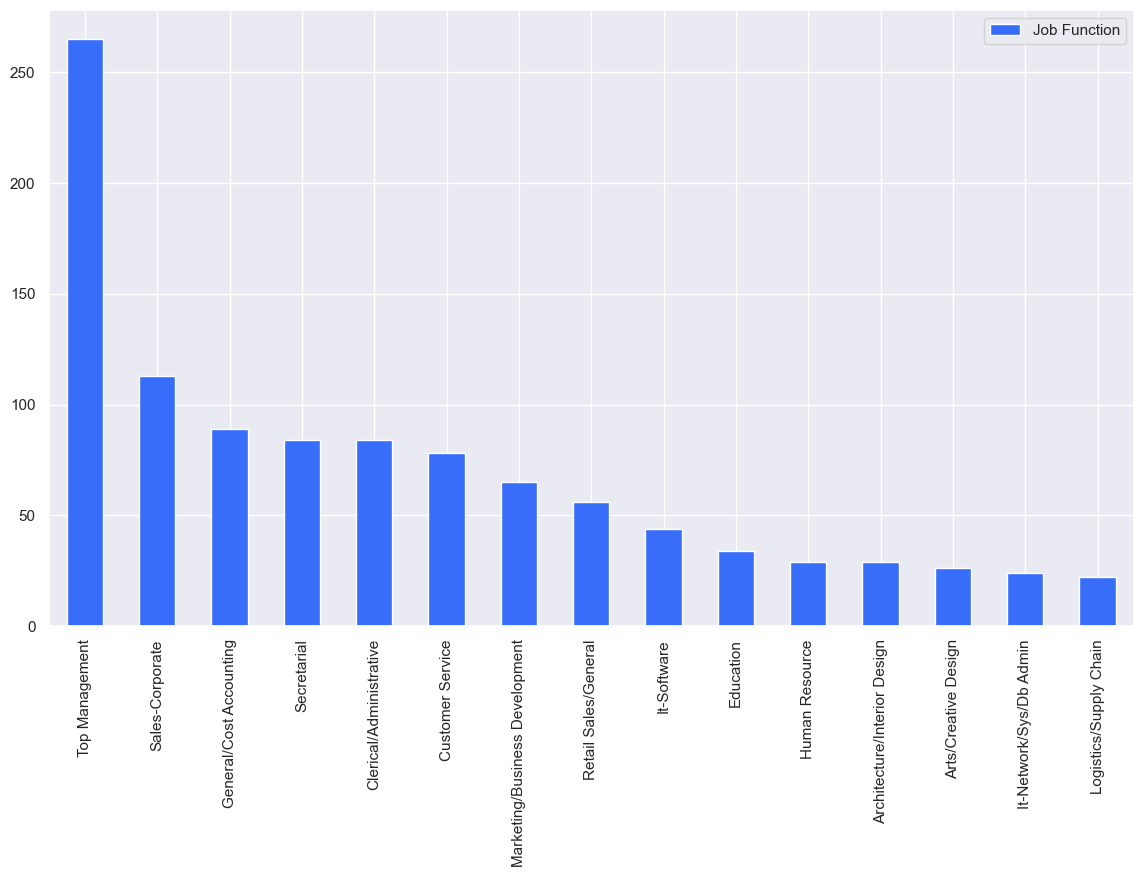

In [369]:
hist.plot(kind='bar')

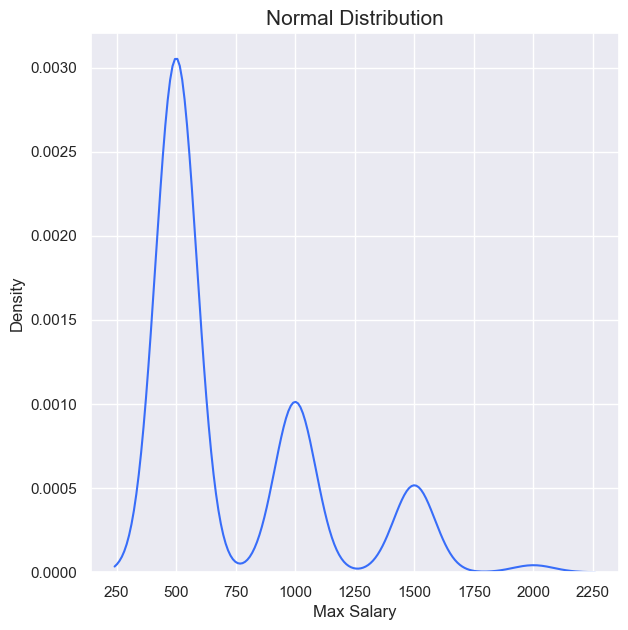

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid", palette="rainbow")

# sns.boxplot(x=df_cleaned['Max Salary'])

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Normal Distribution", fontsize=15)
sns.kdeplot(data = df_cleaned['Max Salary'])

plt.show()


In [345]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_cleaned['Job Title']= label_encoder.fit_transform(df_cleaned['Job Function'])
df_cleaned['Job Title'].unique()

df_cleaned['Job Type']= label_encoder.fit_transform(df_cleaned['Job Type'])
df_cleaned['Job Type'].unique()

df_cleaned['Job Function']= label_encoder.fit_transform(df_cleaned['Job Function'])
df_cleaned['Job Function'].unique()

df_cleaned['Position Level']= label_encoder.fit_transform(df_cleaned['Position Level'])
df_cleaned['Position Level'].unique()

df_cleaned['Working Experience']= label_encoder.fit_transform(df_cleaned['Working Experience'])
df_cleaned['Working Experience'].unique()

df_cleaned['Industry']= label_encoder.fit_transform(df_cleaned['Industry'])
df_cleaned['Industry'].unique()

/var/folders/cn/w0zvn_h90s5c2v3h25bwrfj40000gn/T/ipykernel_777/2524186096.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Job Title']= label_encoder.fit_transform(df_cleaned['Job Function'])
/var/folders/cn/w0zvn_h90s5c2v3h25bwrfj40000gn/T/ipykernel_777/2524186096.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Job Type']= label_encoder.fit_transform(df_cleaned['Job Type'])
/var/folders/cn/w0zvn_h90s5c2v3h25bwrfj40000gn/T/ipykernel_777/2524186096.py:15: SettingWithCopyWarnin

array([14, 21, 31, 20, 32, 28, 26,  2, 11, 17, 22, 27, 10,  4,  8, 15, 18,
       13, 12,  1,  7, 16, 23,  0, 30,  3, 29,  9, 19, 24, 25,  5,  6])

In [346]:
df_cleaned

,Job Title,Job Type,Job Function,Position Level,Working Experience,Industry,Max Salary
2,23,0,23,4,1,14,1000.0
3,23,0,23,1,0,14,1000.0
52,24,0,24,0,2,21,500.0
53,36,0,36,0,4,21,500.0
54,36,0,36,0,4,21,500.0
...,...,...,...,...,...,...,...
14014,39,0,39,1,0,18,500.0
14016,25,0,25,1,4,23,500.0
14021,67,0,67,4,0,18,1000.0
14023,67,0,67,1,0,18,500.0


In [347]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df_cleaned[['Job Title','Industry']])
train_y = np.asanyarray(df_cleaned[['Max Salary']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 2.09753994 -2.19444207]]
Intercept:  [687.73671696]
